c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Map: 100%|██████████| 1586/1586 [00:00<00:00, 21190.44 examples/s]
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_27204\1408659565

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.717600,0.650639,0.726228,0.695592
2,0.538400,0.645530,0.756860,0.737851
3,0.365500,0.697636,0.751755,0.749172
4,0.266700,0.877456,0.760051,0.760942
5,0.166000,1.002475,0.763242,0.764170
6,0.169400,1.037025,0.767071,0.764651
7,0.117100,1.197006,0.768985,0.768449


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_27204\1408659565.py:109: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.060400,1.065680,0.397575,0.226200
2,1.060100,1.063347,0.396937,0.225940
3,1.015900,1.009403,0.514997,0.451838
4,0.990200,0.944967,0.550734,0.535108
5,0.880400,0.915131,0.583280,0.563376
6,0.873900,0.911066,0.576899,0.549409
7,0.867200,0.879104,0.594767,0.580378
8,0.840400,0.869549,0.601787,0.581860
9,0.824300,0.884292,0.606892,0.590259
10,0.768900,0.890442,0.597958,0.580739


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_27204\1408659565.py:109: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.723000,0.647524,0.733248,0.720443
2,0.555000,0.638947,0.743459,0.727615
3,0.427200,0.626046,0.767071,0.764576
4,0.325900,0.719399,0.766433,0.765432
5,0.201200,0.824738,0.765156,0.760826
6,0.189400,0.929612,0.768985,0.769348
7,0.128700,1.023157,0.770262,0.767009
8,0.134900,1.063140,0.770262,0.767269


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_27204\1408659565.py:109: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.081100,1.071103,0.397575,0.226200
2,1.074800,1.074800,0.397575,0.226200
3,1.071300,1.063666,0.397575,0.226200
4,1.067100,1.072415,0.396937,0.228143
5,1.064900,1.063987,0.397575,0.226200
6,1.047300,1.066718,0.397575,0.226200
7,1.067300,1.062820,0.398213,0.264012
8,1.063100,1.059996,0.398851,0.233560


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_27204\1408659565.py:109: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.746300,0.665595,0.721123,0.710680
2,0.579200,0.640545,0.737715,0.725784
3,0.503000,0.641536,0.750479,0.748180
4,0.414800,0.668233,0.752393,0.749597
5,0.316700,0.698241,0.754308,0.747956


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: pramanik-souvik (pramanik-souvik-north-south-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Ensemble Model Accuracy: 0.7352
Classification Report:
               precision    recall  f1-score   support

     Neutral       0.51      0.56      0.54       361
    Positive       0.81      0.78      0.80       654
    Negative       0.81      0.79      0.80       571

    accuracy                           0.74      1586
   macro avg       0.71      0.71      0.71      1586
weighted avg       0.74      0.74      0.74      1586



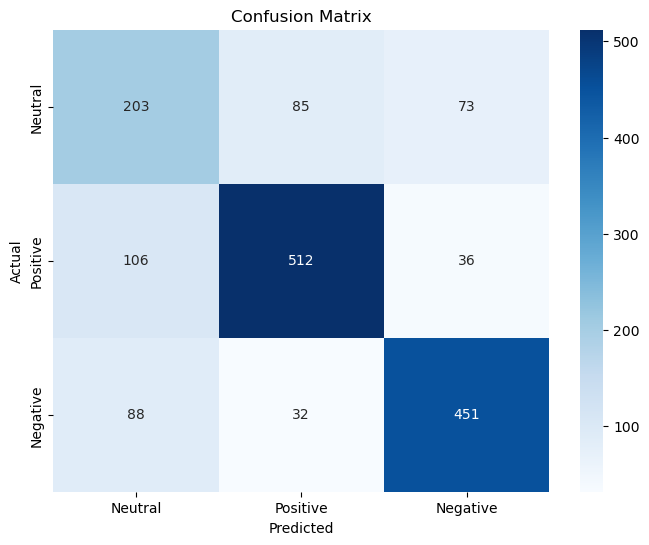

In [1]:
# Imports
import pandas as pd
import numpy as np
import torch
from datasets import Dataset, DatasetDict
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                           Trainer, TrainingArguments, EarlyStoppingCallback)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.cuda.empty_cache()

# Create required folders if not exist
os.makedirs('logs', exist_ok=True)
os.makedirs('models', exist_ok=True)

# Load datasets
train_df = pd.read_csv("data/Train.csv")
val_df = pd.read_csv("data/Val.csv")
test_df = pd.read_csv("data/Test.csv")

# Label mapping
label_mapping = {0: "Neutral", 1: "Positive", 2: "Negative"}
label_list = ["Neutral", "Positive", "Negative"]
label_to_id = {label: idx for idx, label in enumerate(label_list)}

def preprocess(df):
    df = df.dropna()
    df["Label"] = df["Label"].map(label_mapping)
    return df.sample(frac=1, random_state=42).reset_index(drop=True)

train_df = preprocess(train_df)
val_df = preprocess(val_df)
test_df = preprocess(test_df)

# Convert to Hugging Face Datasets
def convert_to_hf_dataset(df):
    return Dataset.from_pandas(pd.DataFrame({'text': df['Data'], 'label': df['Label']}))

dataset = DatasetDict({
    'train': convert_to_hf_dataset(train_df),
    'validation': convert_to_hf_dataset(val_df),
    'test': convert_to_hf_dataset(test_df),
})

# Encode labels
def encode_labels(example):
    example['label'] = label_to_id[example['label']]
    return example

dataset = dataset.map(encode_labels)

# Load tokenizers
tokenizer_banglabert = AutoTokenizer.from_pretrained('csebuetnlp/banglabert')
tokenizer_roberta = AutoTokenizer.from_pretrained('roberta-base')

# Tokenization function
def tokenize_function(example, tokenizer):
    return tokenizer(example['text'], padding='max_length', truncation=True, max_length=128)

# Tokenize datasets
dataset_banglabert = dataset.map(lambda x: tokenize_function(x, tokenizer_banglabert), batched=True)
dataset_roberta = dataset.map(lambda x: tokenize_function(x, tokenizer_roberta), batched=True)

# Final dataset formatting
def prepare_dataset(ds):
    ds = ds.remove_columns(['text', '__index_level_0__']) if '__index_level_0__' in ds.column_names else ds.remove_columns(['text'])
    ds = ds.rename_column('label', 'labels')
    ds.set_format('torch')
    return ds

dataset_banglabert = prepare_dataset(dataset_banglabert)
dataset_roberta = prepare_dataset(dataset_roberta)

# Metrics
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

# Training function
def train(model_name, tokenizer, dataset, learning_rate, epochs, output_dir):
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_list)).to(device)

    args = TrainingArguments(
        output_dir=f"models/{output_dir}",
        evaluation_strategy='epoch',
        save_strategy='epoch',
        learning_rate=learning_rate,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=epochs,
        weight_decay=0.01,
        logging_dir=f'logs/{output_dir}',
        load_best_model_at_end=True,
        metric_for_best_model='eval_loss',
        greater_is_better=False,
        save_total_limit=2,
        logging_steps=50,
        report_to="none"
    )

    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=dataset['train'],
        eval_dataset=dataset['validation'],
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]
    )

    trainer.train()
    return trainer.model

# Train models
model_bbert_1 = train('csebuetnlp/banglabert', tokenizer_banglabert, dataset_banglabert, learning_rate=2e-5, epochs=10, output_dir='bbft_bbert_1')
model_rbert_1 = train('roberta-base', tokenizer_roberta, dataset_roberta, learning_rate=2e-5, epochs=10, output_dir='bbft_rbert_1')
model_bbert_2 = train('csebuetnlp/banglabert', tokenizer_banglabert, dataset_banglabert, learning_rate=1.5e-5, epochs=8, output_dir='bbft_bbert_2')
model_rbert_2 = train('roberta-base', tokenizer_roberta, dataset_roberta, learning_rate=1.5e-5, epochs=8, output_dir='bbft_rbert_2')
model_bbert_3 = train('csebuetnlp/banglabert', tokenizer_banglabert, dataset_banglabert, learning_rate=1e-5, epochs=5, output_dir='bbft_bbert_3')

# Ensemble prediction
def ensemble_predict(models, dataset_test):
    all_preds = []
    for model in models:
        trainer = Trainer(model=model)
        preds = trainer.predict(dataset_test)
        preds = np.argmax(preds.predictions, axis=1)
        all_preds.append(preds)
    all_preds = np.array(all_preds)
    final_preds = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=all_preds)  # Majority voting
    return final_preds

ensemble_models = [model_bbert_1, model_rbert_1, model_bbert_2, model_rbert_2, model_bbert_3]
ensemble_preds = ensemble_predict(ensemble_models, dataset_banglabert['test'])  # Test on BanglaBERT tokenized dataset

# Evaluation
test_labels = dataset_banglabert['test']['labels'].numpy()

accuracy = accuracy_score(test_labels, ensemble_preds)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")

report = classification_report(test_labels, ensemble_preds, target_names=label_list)
print("Classification Report:\n", report)

# Confusion Matrix
conf_mat = confusion_matrix(test_labels, ensemble_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Map: 100%|██████████| 1586/1586 [00:00<00:00, 15652.56 examples/s]
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_27204\3053621005.py:111: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.797800,0.646864,0.733886,0.708531
2,0.558800,0.615756,0.744097,0.729300
3,0.412800,0.706385,0.756222,0.758749
4,0.278800,0.778735,0.767071,0.766555


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_27204\3053621005.py:111: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.070100,1.066815,0.397575,0.226200
2,1.065400,1.061543,0.397575,0.226200
3,1.058400,1.056275,0.458200,0.408471
4,0.999600,0.950397,0.547543,0.536538
5,0.968600,0.907345,0.571793,0.559529
6,0.927600,0.899903,0.578813,0.553384
7,0.875900,0.896116,0.582004,0.557859
8,0.852900,0.852893,0.600511,0.585391
9,0.818400,0.851499,0.599234,0.591657
10,0.812500,0.864004,0.606254,0.592987


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_27204\3053621005.py:111: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.815900,0.651733,0.728781,0.707949
2,0.590700,0.632319,0.748564,0.737368
3,0.456300,0.628701,0.758137,0.760024
4,0.331400,0.678558,0.773452,0.773864
5,0.272200,0.819694,0.772814,0.774185


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_27204\3053621005.py:111: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.072000,1.072080,0.397575,0.226200
2,1.073200,1.064474,0.397575,0.226200
3,1.067000,1.064756,0.397575,0.226200
4,1.062600,1.059810,0.397575,0.226200
5,1.059400,1.058000,0.397575,0.226200
6,1.052300,1.048179,0.400766,0.250341
7,1.027400,0.995325,0.516911,0.490823
8,0.990900,0.965076,0.539885,0.510832


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\USERAS\AppData\Local\Temp\ipykernel_27204\3053621005.py:111: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.829700,0.657538,0.723676,0.713048
2,0.614900,0.627579,0.742821,0.729847
3,0.511600,0.638015,0.761327,0.757298
4,0.416900,0.657643,0.757498,0.755236




✅ Ensemble Model Accuracy: 0.7308

Classification Report:
               precision    recall  f1-score   support

     Neutral       0.49      0.57      0.53       361
    Positive       0.83      0.76      0.79       654
    Negative       0.80      0.80      0.80       571

    accuracy                           0.73      1586
   macro avg       0.71      0.71      0.71      1586
weighted avg       0.74      0.73      0.74      1586



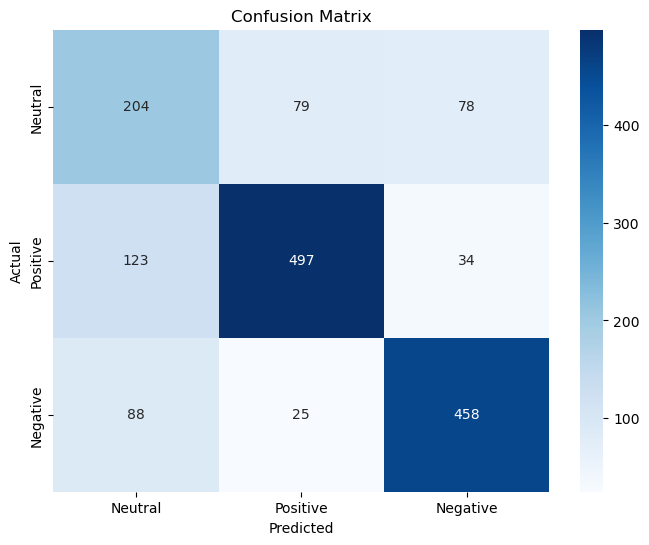

In [3]:
# Imports
import pandas as pd
import numpy as np
import torch
from datasets import Dataset, DatasetDict
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification, 
    Trainer, TrainingArguments, EarlyStoppingCallback, 
    set_seed
)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch._dynamo

# Suppress PyTorch compile errors
torch._dynamo.config.suppress_errors = True

# Set seed for reproducibility
set_seed(42)

# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.cuda.empty_cache()

# Load datasets
train_df = pd.read_csv("data/Train.csv")
val_df = pd.read_csv("data/Val.csv")
test_df = pd.read_csv("data/Test.csv")

# Label mapping
label_mapping = {0: "Neutral", 1: "Positive", 2: "Negative"}
label_list = ["Neutral", "Positive", "Negative"]
label_to_id = {label: idx for idx, label in enumerate(label_list)}

# Preprocessing
def preprocess(df):
    df = df.dropna()
    df["Label"] = df["Label"].map(label_mapping)
    return df.sample(frac=1, random_state=42).reset_index(drop=True)

train_df = preprocess(train_df)
val_df = preprocess(val_df)
test_df = preprocess(test_df)

# Convert to Hugging Face Dataset
def convert_to_hf_dataset(df):
    return Dataset.from_pandas(pd.DataFrame({'text': df['Data'], 'label': df['Label']}))

dataset = DatasetDict({
    'train': convert_to_hf_dataset(train_df),
    'validation': convert_to_hf_dataset(val_df),
    'test': convert_to_hf_dataset(test_df),
})

# Encode labels numerically
def encode_labels(example):
    example['label'] = label_to_id[example['label']]
    return example

dataset = dataset.map(encode_labels)

# Load tokenizers
tokenizer_banglabert = AutoTokenizer.from_pretrained('csebuetnlp/banglabert')
tokenizer_roberta = AutoTokenizer.from_pretrained('roberta-base')

# Tokenization function
def tokenize_function(example, tokenizer):
    return tokenizer(example['text'], padding='max_length', truncation=True, max_length=256)

# Tokenize datasets
dataset_banglabert = dataset.map(lambda x: tokenize_function(x, tokenizer_banglabert), batched=True)
dataset_roberta = dataset.map(lambda x: tokenize_function(x, tokenizer_roberta), batched=True)

# Prepare datasets for Trainer
def prepare_dataset(ds):
    ds = ds.remove_columns(['text'])
    ds = ds.rename_column('label', 'labels')
    ds.set_format('torch')
    return ds

dataset_banglabert = prepare_dataset(dataset_banglabert)
dataset_roberta = prepare_dataset(dataset_roberta)

# Training function
def train(model_name, tokenizer, dataset, learning_rate, epochs, output_dir):
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_list)).to(device)
    
    args = TrainingArguments(
        output_dir=f"outputs/{output_dir}",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=learning_rate,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=epochs,
        weight_decay=0.01,
        logging_dir=f"logs/{output_dir}",
        load_best_model_at_end=True,
        metric_for_best_model='eval_loss',
        greater_is_better=False,
        save_total_limit=2,
        bf16=torch.cuda.is_bf16_supported(),
        report_to="none",
        save_safetensors=True,
        ddp_find_unused_parameters=False,
        torch_compile=True,
    )
    
    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=dataset['train'],
        eval_dataset=dataset['validation'],
        tokenizer=tokenizer,
        compute_metrics=lambda p: {
            'accuracy': accuracy_score(p.label_ids, np.argmax(p.predictions, axis=1)),
            'f1': f1_score(p.label_ids, np.argmax(p.predictions, axis=1), average='weighted')
        },
        callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
    )
    
    trainer.train()
    
    model.save_pretrained(f"models/{output_dir}")
    tokenizer.save_pretrained(f"models/{output_dir}")
    
    return model

# Train models
os.makedirs("outputs", exist_ok=True)
os.makedirs("models", exist_ok=True)

model_bbert_1 = train('csebuetnlp/banglabert', tokenizer_banglabert, dataset_banglabert, learning_rate=2e-5, epochs=10, output_dir='bbft_bbert_1')
model_rbert_1 = train('roberta-base', tokenizer_roberta, dataset_roberta, learning_rate=2e-5, epochs=10, output_dir='bbft_rbert_1')
model_bbert_2 = train('csebuetnlp/banglabert', tokenizer_banglabert, dataset_banglabert, learning_rate=1.5e-5, epochs=8, output_dir='bbft_bbert_2')
model_rbert_2 = train('roberta-base', tokenizer_roberta, dataset_roberta, learning_rate=1.5e-5, epochs=8, output_dir='bbft_rbert_2')
model_bbert_3 = train('csebuetnlp/banglabert', tokenizer_banglabert, dataset_banglabert, learning_rate=1e-5, epochs=5, output_dir='bbft_bbert_3')

# Ensemble prediction
from scipy.stats import mode

def ensemble_predict(models, dataset):
    all_preds = []
    for model in models:
        trainer = Trainer(model=model)
        preds = trainer.predict(dataset)
        preds = np.argmax(preds.predictions, axis=1)
        all_preds.append(preds)
    all_preds = np.stack(all_preds, axis=1)
    final_preds, _ = mode(all_preds, axis=1)
    return final_preds.ravel()

ensemble_models = [model_bbert_1, model_rbert_1, model_bbert_2, model_rbert_2, model_bbert_3]
ensemble_preds = ensemble_predict(ensemble_models, dataset_banglabert['test'])

# Evaluation
test_labels = dataset_banglabert['test']['labels']

accuracy = accuracy_score(test_labels, ensemble_preds)
print(f"\n\n✅ Ensemble Model Accuracy: {accuracy:.4f}\n")

report = classification_report(test_labels, ensemble_preds, target_names=label_list)
print("Classification Report:\n", report)

# Confusion Matrix
conf_mat = confusion_matrix(test_labels, ensemble_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
